In [ ]:
# HW Module 5
# mchepelva
#

In [ ]:
In this exercise the task is to predict a quantitative measure of diabetes progression one year after baseline using the following socio-demographic and clinical parameters: age, sex, body mass index, average blood pressure, total serum cholesterol, low-density lipoproteins, high-density lipoproteins, total cholesterol, possibly log of serum triglycerides level, and blood sugar level.


 Load the Diabetes dataset from the sklearn.datasets library.

 Divide the data into training and test subsets in 75:25 ratio (hint: sklearn.model_selection.train_test_split).

 Train random forest regressor using the training dataset and predict the labels using the test dataset.

 Calculate and print mean squared error (hint: sklearn.metrics.mean_squared_error).
#
 Repeat the training with random search optimization of the following hyperparameters of random forest: number of trees in the forest, the number of features to consider when looking for the best split (hint: n_estimators and max_features). 
    Generate randomly number of trees in the range [100, 1000], and max number of features at the split between 30% and 90% of features (hint: scipy.stats.randint, scipy.stats.uniform).

 Compare the performance with and without hyperparameter optimization.

 Calculate the feature importance of the best model based on mean impurity decease. Which feature is the most important?

In [47]:
import pandas as pd
import numpy as np
import sklearn as sk
from scipy.stats import randint, uniform
from sklearn import datasets
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.feature_selection import mutual_info_classif
from sklearn import metrics
import matplotlib.pyplot as plt

In [48]:
data =  datasets.load_diabetes(as_frame=True)
df = data['data']
df.shape
df.head()
target = data['target']
#print(target)

In [49]:
# Divide training and test subsets
X_train, X_test, y_train, y_test = train_test_split(df, target, test_size=0.25, random_state=1)

In [50]:
# RF
n_trees = 100  
max_depth = 4
model = RandomForestRegressor(n_estimators=n_trees, max_depth=max_depth, bootstrap=True, random_state=10)  

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("MSE (max depth = 4): %.2f" % metrics.mean_squared_error(y_test, y_pred))

MSE (max depth = 4): 3753.89


In [51]:
# Hyperparameters estimation: random search
model_rfr = RandomForestRegressor(max_depth=max_depth, random_state=1)

param_dist = {
    'n_estimators': randint(100, 1001), 
    'max_features': uniform(0.3, 0.9)
}

# Create a RandomizedSearchCV object
model_randsearch = RandomizedSearchCV(
    model_rfr,
    param_distributions=param_dist,
    n_iter=50,  # Number of random parameter combinations to try
    verbose=0,
    cv=5,  # Number of cross-validation folds
    random_state=1
)

# Fit the random search
model_randsearch.fit(X_train, y_train)
print("The best hyperparameters:", model_randsearch.best_params_)

y_pred_rand = model_randsearch.predict(X_test)
acc = metrics.mean_squared_error(y_test, y_pred_rand)
print('MSE with random search hyperparameter optimization: %.2f' % (acc))

C:\Users\mchepeleva\Documents\Anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
60 fits failed out of a total of 250.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\mchepeleva\Documents\Anaconda\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\mchepeleva\Documents\Anaconda\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\mchepeleva\Documents\Anaconda\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constrai

The best hyperparameters: {'max_features': 0.42372723373161375, 'n_estimators': 432}
MSE with random search hyperparameter optimization: 3356.05


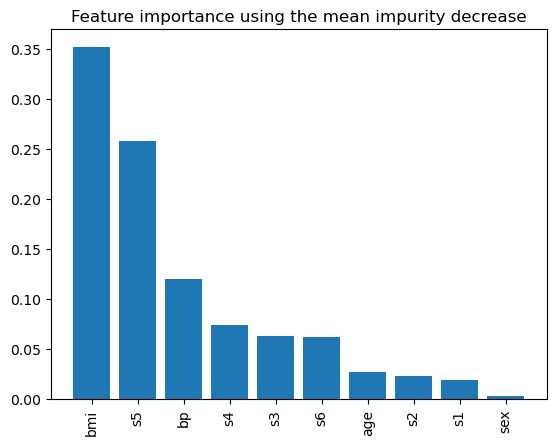

In [52]:
# Feature importance: mean decrease in impurity
model = model_randsearch.best_estimator_ # best model

importances = model.feature_importances_ 
sorted_ind = np.argsort(importances) # Returns the indices that would sort an array.
                  
    # Plot features sorted by importance (from highest to lowest)
importances = importances[sorted_ind][::-1] # importances in reverse order
features = X_train.columns[sorted_ind][::-1] # features in reverse order
plt.figure()
plt.bar(features, height=importances)
plt.xticks(rotation='vertical')
plt.title('Feature importance using the mean impurity decrease')
plt.show()
    
# Body Mass Index is the most important feature in diabetes progression dataset.